# Predizione dell'andamento degli Shampi

In [2]:
from model_optimise import TrendModel, FitTrendModel
from importa_dati import NumericalCSVFile
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import math

In [3]:
# Creo un'istanza della classe NumericalCSVFile con il nome del file 'shampoo_sales.csv'
shampoofile = NumericalCSVFile('../../dati/shampoo_sales.csv')

# Chiamo il metodo get_data per ottenere i dati numerici
lista_dati = shampoofile.get_data()

# Separiamo le date e i valori in due liste
dates = [item[0] for item in lista_dati]
values = [item[1] for item in lista_dati]

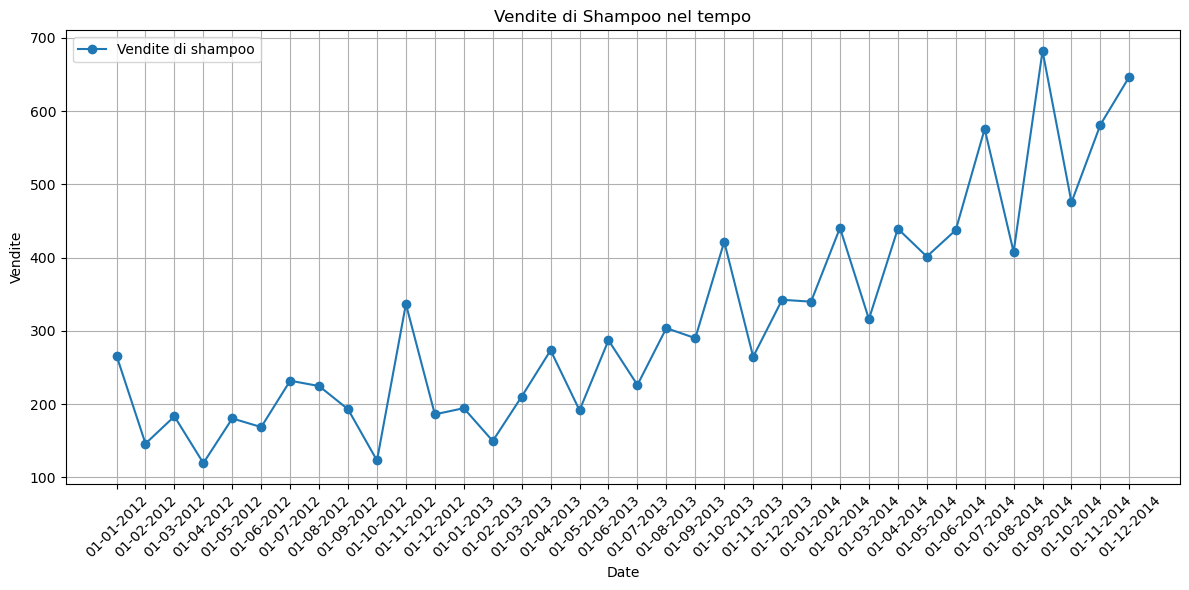

In [4]:
# Plot dei dati
plt.figure(figsize=(12, 6))
plt.plot(dates, values, marker='o', linestyle='-', label='Vendite di shampoo')
plt.title('Vendite di Shampoo nel tempo')
plt.xlabel('Date')
plt.ylabel('Vendite')
plt.xticks(rotation=45)  # Ruota le etichette delle date per una migliore leggibilità
plt.legend()
plt.grid(True)
plt.tight_layout()  # Migliora la disposizione degli elementi nel grafico
plt.show()

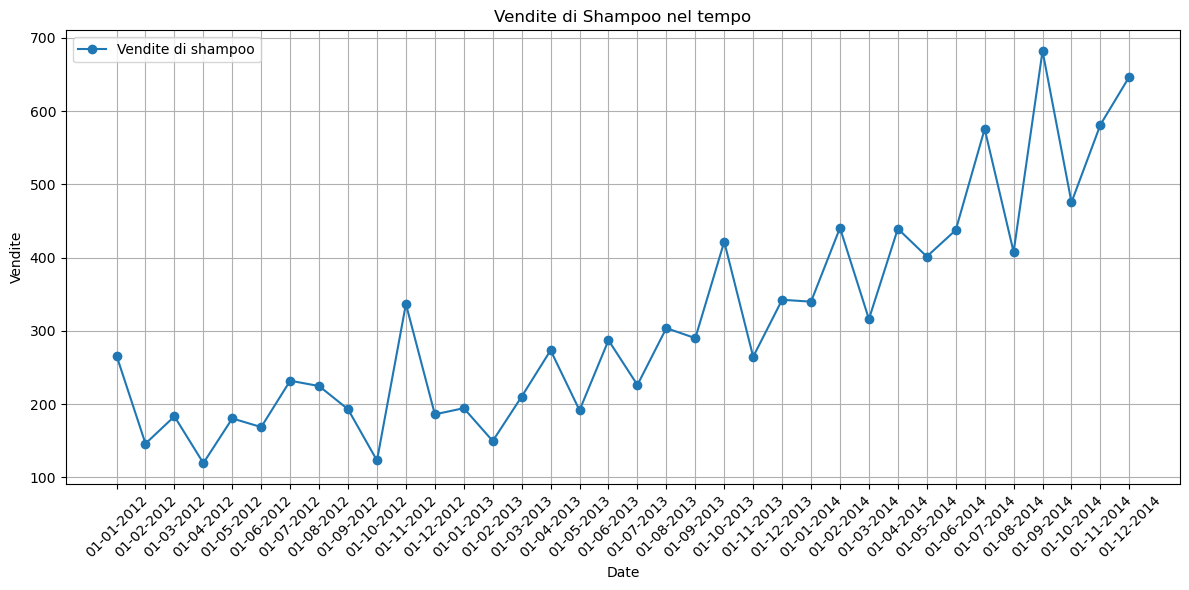

In [5]:
# Carica il file CSV
df = pd.read_csv("../../dati/shampoo_sales.csv")

dates = df['Date'].values
values = df['Sales'].values

# Plot dei dati
plt.figure(figsize=(12, 6))
plt.plot(df['Date'].values, values, marker='o', linestyle='-', label='Vendite di shampoo')
plt.title('Vendite di Shampoo nel tempo')
plt.xlabel('Date')
plt.ylabel('Vendite')
plt.xticks(rotation=45)  # Ruota le etichette delle date per una migliore leggibilità
plt.legend()
plt.grid(True)
plt.tight_layout()  # Migliora la disposizione degli elementi nel grafico
plt.show()

In [18]:
# --- PREPARAZIONE DATI ---
# Creo un'istanza della classe NumericalCSVFile con il nome del file 'shampoo_sales.csv'
shampoofile = NumericalCSVFile('../../dati/shampoo_sales.csv')

# Chiamo il metodo get_data per ottenere i dati numerici
lista_dati = shampoofile.get_data()

# Separiamo le date e i valori in due liste
dates = [item[0] for item in lista_dati]
values = [item[1] for item in lista_dati]

# Dati usati per addestrare il modello FitTrendModel (fino alla 24° osservazione)
fit_values = values[:24]
# Dati di test (dal 25° elemento in poi)
test_values = values[24:]
# Dati da cui iniziare a prevedere per TrendModel (ultimi 3 del fit + test)
data = values[21:]
window = 2  # Finestra mobile per il modello

In [19]:
# --- MODELLO TREND SEMPLICE (senza fit) ---

trend_model = TrendModel(window=2)
pred_data = [values[23]]  # primo punto noto da cui parte la previsione
# Ciclo di previsione per TrendModel
for i, item in enumerate(data[:]):
    if i >= window:
        prediction = trend_model.predict(data[i-window:i])
        pred_data.append(prediction)

In [20]:
# --- MODELLO FITTREND (con fit) ---

fit_trend_model = FitTrendModel(window=2)
fit_pred_data = []

# Prime due osservazioni reali passate al modello per iniziare a predire
predicted_values = data[:window]
# Fase di "fit" con i dati storici
fit_trend_model.fit(fit_values)
# Previsioni passo-passo su test_values
for i in range(len(test_values) - window):
    prediction = fit_trend_model.predict(predicted_values)
    fit_pred_data.append(prediction)
    del predicted_values[0]  # rimuove il più vecchio
    predicted_values.append(test_values[i + window])  # aggiunge il nuovo valore reale

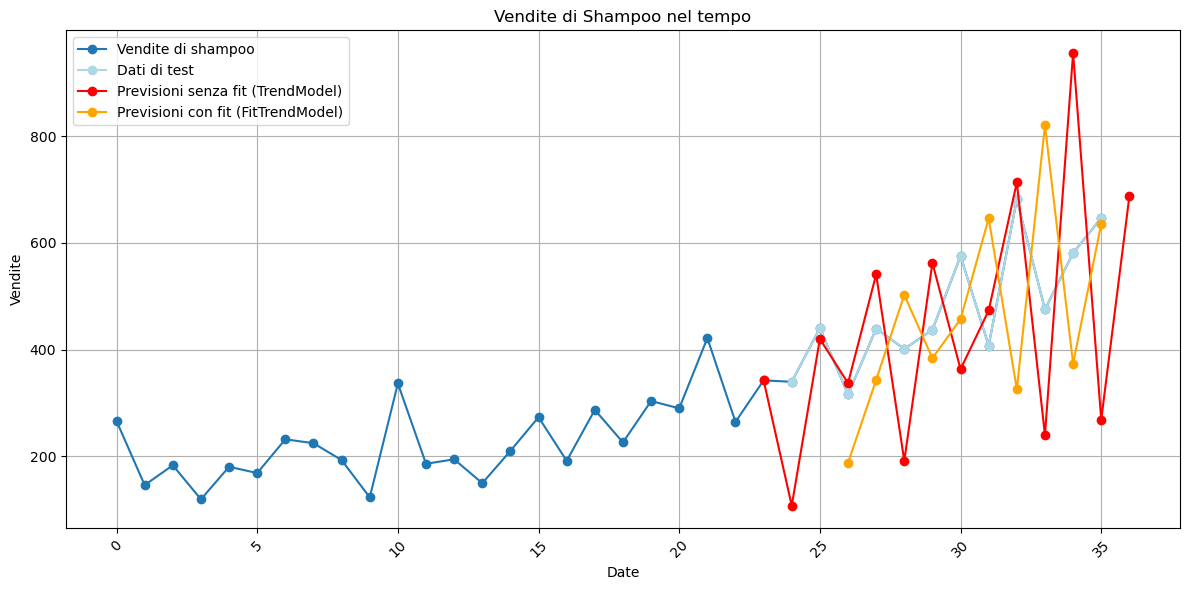

In [21]:
# --- PLOT DEI RISULTATI ---

x = list(range(len(values)))  # asse x per tutti i dati reali
x_pred = list(range(23, 23 + len(pred_data)))  # asse x per previsioni TrendModel
x_fit = list(range(26, 26 + len(fit_pred_data)))  # asse x per previsioni FitTrendModel

plt.figure(figsize=(12, 6))
plt.plot(x, values, marker='o', linestyle='-', label='Vendite di shampoo')
plt.plot(x[24:], test_values, color='lightblue', marker='o', linestyle='-', label='Dati di test')
plt.plot(x_pred, pred_data, color='red', marker='o', linestyle='-', label='Previsioni senza fit (TrendModel)')
plt.plot(x_fit, fit_pred_data, color='orange', marker='o', linestyle='-', label='Previsioni con fit (FitTrendModel)')
plt.title('Vendite di Shampoo nel tempo')
plt.xlabel('Date')
plt.ylabel('Vendite')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [22]:
# --- VALUTAZIONE MAE (già fornito da Model.evaluate) ---
mae_trend = trend_model.evaluate(values)
mae_fit_trend = fit_trend_model.evaluate(values)

print(f"TrendModel → MAE: {mae_trend:.2f}")
print(f"FitTrendModel → MAE: {mae_fit_trend:.2f}")

TrendModel → MAE: 240.88
FitTrendModel → MAE: 179.67


In [23]:
# --- VALUTAZIONE RMSE (già fornito da Model.evaluate) ---
rmse_trend = trend_model.evaluate_rmse(values)
rmse_fit_trend = fit_trend_model.evaluate_rmse(values)


print(f"TrendModel → MAE: {mae_trend:.2f}, RMSE: {rmse_trend:.2f}")
print(f"FitTrendModel → MAE: {mae_fit_trend:.2f}, RMSE: {rmse_fit_trend:.2f}")


TrendModel → MAE: 240.88, RMSE: 283.54
FitTrendModel → MAE: 179.67, RMSE: 212.89


In [16]:
# --- Funzioni di supporto ---

def fit_line(x, y):
    """
    Calcola il fitting lineare dei dati su una retta y = mx + q.
    """
    if len(x) != len(y):
        raise ValueError("Le liste x e y devono avere la stessa lunghezza.")
    if len(x) < 2:
        raise ValueError("Sono necessari almeno due punti per calcolare una retta.")
    
    N = len(x)
    sum_x = sum(x)
    sum_y = sum(y)
    sum_xy = sum(x[i] * y[i] for i in range(N))
    sum_x_squared = sum(x[i] ** 2 for i in range(N))

    m = (N * sum_xy - sum_x * sum_y) / (N * sum_x_squared - sum_x ** 2)
    q = (sum_y - m * sum_x) / N
    return m, q

def predict(x_val, m, q):
    """
    Predice il valore y usando una retta y = mx + q.
    """
    return m * x_val + q

def calculate_rmse(y_real, y_pred):
    if len(y_real) != len(y_pred):
        raise ValueError("Le liste devono avere la stessa lunghezza.")
    mse = sum((y_real[i] - y_pred[i]) ** 2 for i in range(len(y_real))) / len(y_real)
    return math.sqrt(mse)

def calculate_mae(y_real, y_pred):
    if len(y_real) != len(y_pred):
        raise ValueError("Le liste devono avere la stessa lunghezza.")
    errors = [abs(y_real[i] - y_pred[i]) for i in range(len(y_real))]
    return sum(errors) / len(errors)



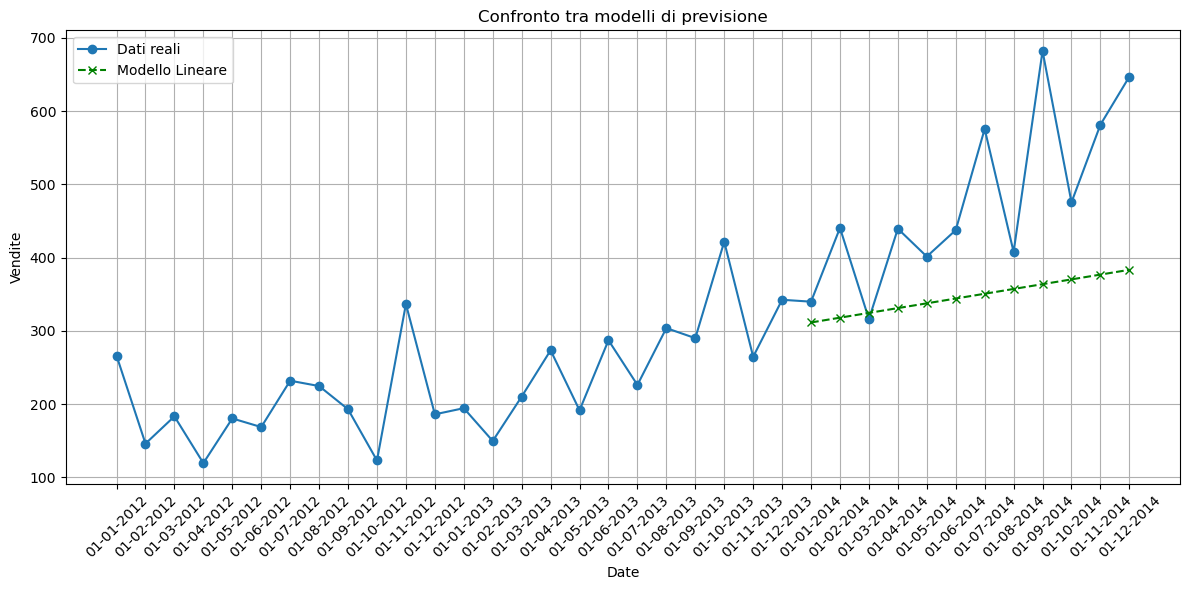

In [13]:
# --- Fitting della retta ---

x_fit = list(range(1, 25))
m, q = fit_line(x_fit, fit_values)

# Predizioni sulla parte di test (dal punto 25 in poi)
x_test = list(range(25, 1 + len(values)))
retta_pred = [predict(i, m, q) for i in range(25, 1 + len(values))]


# --- PLOT ---
x = list(range(len(values)))

plt.figure(figsize=(12, 6))
plt.plot(dates, values, marker='o', label='Dati reali')
plt.plot(dates[24:], retta_pred, color='green', linestyle='--', marker='x', label='Modello Lineare')
plt.title('Confronto tra modelli di previsione')
plt.xlabel('Date')
plt.ylabel('Vendite')
plt.xticks(rotation=45)
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


In [24]:
# --- Calcolo errori --- Modello lineare (solo su test)
mae_line = calculate_mae(test_values, retta_pred)
rmse_line = calculate_rmse(test_values, retta_pred)

# --- STAMPA RISULTATI ---
print(f"TrendModel      → MAE: {mae_trend:.2f}, RMSE: {rmse_trend:.2f}")
print(f"FitTrendModel   → MAE: {mae_fit_trend:.2f}, RMSE: {rmse_fit_trend:.2f}")
print(f"Modello Lineare → MAE: {mae_line:.2f}, RMSE: {rmse_line:.2f}")

TrendModel      → MAE: 240.88, RMSE: 283.54
FitTrendModel   → MAE: 179.67, RMSE: 212.89
Modello Lineare → MAE: 132.71, RMSE: 162.65


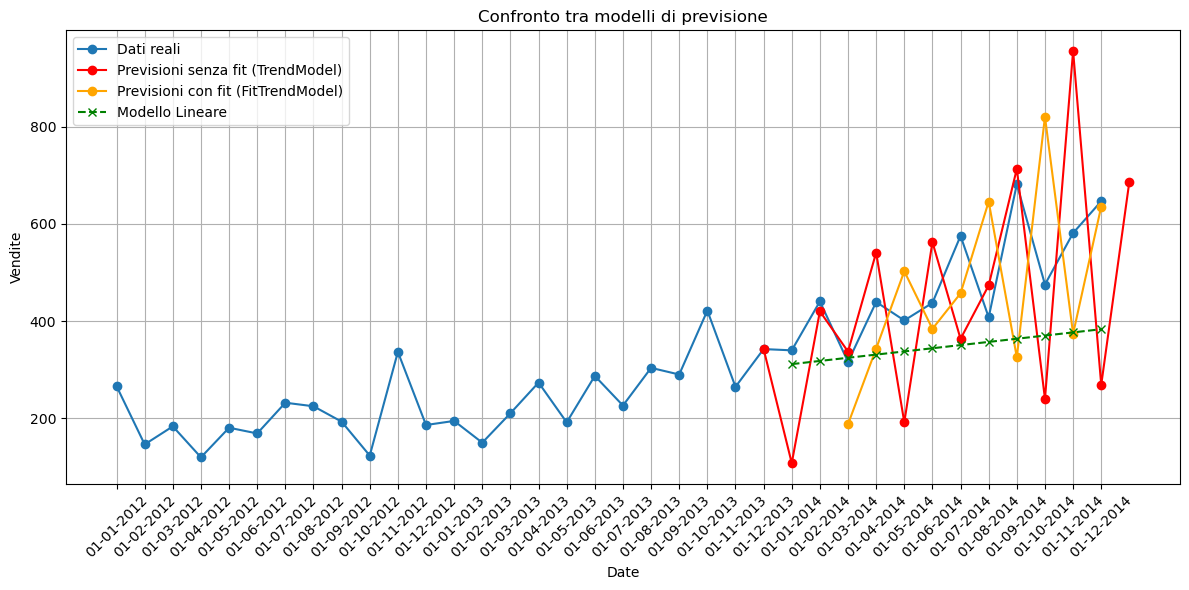

In [25]:
# --- PLOT COMPLETO ---
x = list(range(len(values)))
x_pred = list(range(23, 23 + len(pred_data)))
x_fit = list(range(26, 26 + len(fit_pred_data)))

plt.figure(figsize=(12, 6))
plt.plot(dates, values, marker='o', label='Dati reali')
plt.plot(x_pred, pred_data, color='red', marker='o', linestyle='-', label='Previsioni senza fit (TrendModel)')
plt.plot(x_fit, fit_pred_data, color='orange', marker='o', linestyle='-', label='Previsioni con fit (FitTrendModel)')
plt.plot(dates[24:], retta_pred, color='green', linestyle='--', marker='x', label='Modello Lineare')
plt.title('Confronto tra modelli di previsione')
plt.xlabel('Date')
plt.ylabel('Vendite')
plt.xticks(rotation=45)
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

In [27]:
# --- POLINOMIO DI GRADO 2 (fit su fit_values, predizione su test_values) ---
x_fit = np.arange(1, 25)  # 1...24
coeffs = np.polyfit(x_fit, fit_values, deg=2)  # grado 2
poly = np.poly1d(coeffs)

x_test = np.arange(25, len(values) + 1)  # 25...36
poly_pred = poly(x_test)

# Polinomio grado 2
mae_poly = calculate_mae(test_values, poly_pred)
rmse_poly = calculate_rmse(test_values, poly_pred)

# --- STAMPA RISULTATI ---
print(f"TrendModel      → MAE: {mae_trend:.2f}, RMSE: {rmse_trend:.2f}")
print(f"FitTrendModel   → MAE: {mae_fit_trend:.2f}, RMSE: {rmse_fit_trend:.2f}")
print(f"Modello Lineare → MAE: {mae_line:.2f}, RMSE: {rmse_line:.2f}")
print(f"Polinomio grado 2 → MAE: {mae_poly:.2f}, RMSE: {rmse_poly:.2f}")

TrendModel      → MAE: 240.88, RMSE: 283.54
FitTrendModel   → MAE: 179.67, RMSE: 212.89
Modello Lineare → MAE: 132.71, RMSE: 162.65
Polinomio grado 2 → MAE: 61.62, RMSE: 73.91


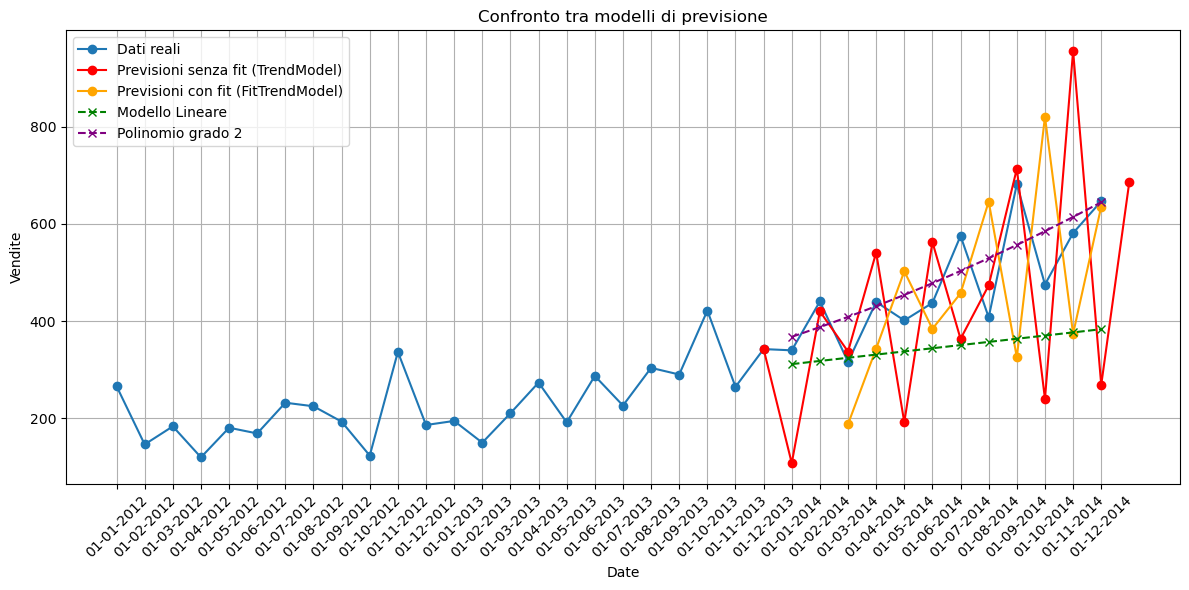

In [28]:
# --- PLOT COMPLETO ---
x = list(range(len(values)))
x_pred = list(range(23, 23 + len(pred_data)))
x_fit = list(range(26, 26 + len(fit_pred_data)))

plt.figure(figsize=(12, 6))
plt.plot(dates, values, marker='o', label='Dati reali')
plt.plot(x_pred, pred_data, color='red', marker='o', linestyle='-', label='Previsioni senza fit (TrendModel)')
plt.plot(x_fit, fit_pred_data, color='orange', marker='o', linestyle='-', label='Previsioni con fit (FitTrendModel)')
plt.plot(dates[24:], retta_pred, color='green', linestyle='--', marker='x', label='Modello Lineare')
plt.plot(dates[24:], poly_pred, color='purple', linestyle='--', marker='x', label='Polinomio grado 2')
plt.title('Confronto tra modelli di previsione')
plt.xlabel('Date')
plt.ylabel('Vendite')
plt.xticks(rotation=45)
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

Si potrebbe utilizzare anche la libreria `statsmodels` per eseguire una regressione lineare con output statistici più dettagliati ma noi non la vedremo. Vedremo però come è facile usare `scikit-learn`.